#1. Import File

In [1]:
# Import File
import pandas as pd
import numpy as np

# make PassengerId Column as index of dataframe.
df = pd.read_csv("./titanic_train.csv", index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2. Fill missing data

In [2]:
# Let's see how data looks like.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Exercise 1 (0.4p)
: Some age cells are empty. Let's fill these cells with the average value of passengers who boarded at the same embarkation point.

In [3]:
df[df['Age'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### Exercise 1-1
Remove 'nan' value in embaked column

In [4]:
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [5]:
# remove nan in column 'Embaked'.
print("\n\n\n>>>> Before:")
display(df[df['Embarked'].isnull()])

# Get row_index that Embaked value is 'nan'
nan_index = df[df['Embarked'].isnull()].index
print(nan_index)

# Drop it.
df = df.drop(nan_index, axis = 0)

print("\n\n\n>>>> Ater:")
display(df[df['Embarked'].isnull()])




>>>> Before:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Index([62, 830], dtype='int64', name='PassengerId')



>>>> Ater:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Exercise 1-2
First, Replace the NaN values in the 'Age' column with the average value
for rows where 'Embarked' is 'S'.










In [6]:
df_embarkS = df.copy()

print('number of null data in Age column in Embark S: ', len(df_embarkS[(df_embarkS['Embarked'] == 'S') & (df_embarkS['Age'].isnull())]['Age']))

# Calc age mean for embarked == S.
age_mean_embarkS = df_embarkS[df_embarkS['Embarked'] == 'S']['Age'].mean()

# replace nan with mean
df_embarkS.loc[df_embarkS['Embarked'] == 'S', 'Age'] = df_embarkS.loc[df_embarkS['Embarked'] == 'S', 'Age'].fillna(age_mean_embarkS)

# check it.
print('number of null data in Age column in Embark S: ', len(df_embarkS[(df_embarkS['Embarked'] == 'S') & (df_embarkS['Age'].isnull())]['Age']))

number of null data in Age column in Embark S:  90
number of null data in Age column in Embark S:  0


### Exercise 1-3
Now deal with all Embarks.
Use lambda (with .fillna()) and groupby










In [7]:
df_age_filled = df.copy()

print(f"Before:\tNumber of nulls in df_age_filled['Age']: {df_age_filled['Age'].isnull().sum()}")

df_age_filled['Age'] = df_age_filled.groupby('Embarked')['Age'].transform(lambda x: x.fillna(x.mean()))

print(f"After:\tNumber of nulls in df_age_filled['Age']: {df_age_filled['Age'].isnull().sum()}")

print("\n\n>>>> Displaying null value in df('Age')")
display(df[df['Age'].isnull()].head())

print("\n\n>>>> Displaying null value in df_age_filled('Age')")
display(df_age_filled[df_age_filled['Age'].isnull()])

Before:	Number of nulls in df_age_filled['Age']: 177
After:	Number of nulls in df_age_filled['Age']: 0


>>>> Displaying null value in df('Age')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q




>>>> Displaying null value in df_age_filled('Age')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


## Exercise 2 (0.3p)
Let's modify columns 'Fare' and 'Age.

- For column 'Fare', let's convert the original value (pound) to won. ("Assume 1 pound equals 2000 won.")

- For column 'Age', let's add a new column 'Floored_Age' to the dataframe. (34 -> 30 / 28 -> 20 / 55 -> 50)


In [8]:
# df_new = df_age_filled.copy()
# df_new.reset_index(drop = True, inplace = True)

# print("\n\n>>>> Displaying before convert"); display(df_new.head())

# #conver pound to won
# df_new['Fare'] = df_new['Fare'] * 2000;

# print("\n\n>>>> Displaying after convert"); display(df_new.head())

# #Add a column 'Floored_age' and fill the values calculated on'Age' column.
# data = " _____type your code here_____"
# index = " _____type your code here_____"
# new_ser = " _____type your code here_____"
# df_new = pd.concat(objs = [df_new, new_ser], axis=1)

# print("\n\n\n>>>> Displaying after add new Column"); df_new.head(5)


df_new = df_age_filled.copy()
df_new.reset_index(drop=True, inplace=True)

print("\n\n>>>> Displaying before convert")
display(df_new.head())

# Convert pound to won
df_new['Fare'] = df_new['Fare'] * 2000

print("\n\n>>>> Displaying after convert")
display(df_new.head())

# Add a column 'Floored_Age' and fill the values calculated on 'Age' column.
df_new['Floored_Age'] = (df_new['Age'] // 10) * 10  # 나이를 10의 자리로 내림

print("\n\n\n>>>> Displaying after add new Column")
display(df_new.head(5))




>>>> Displaying before convert


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




>>>> Displaying after convert


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,14500.0,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,142566.6,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,15850.0,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,106200.0,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,16100.0,NaN,S





>>>> Displaying after add new Column


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Floored_Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,14500.0,NaN,S,20.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,142566.6,C85,C,30.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,15850.0,NaN,S,20.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,106200.0,C123,S,30.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,16100.0,NaN,S,30.0


## Exercise 3: Plot (0.3p)


In [9]:
df_plot = df_new.copy()
# df_plot = pd.read_csv("./save.csv")

### Exercise 3-1
Plot Age - fare graph for each Embarkation...
First, Plot for embark - S

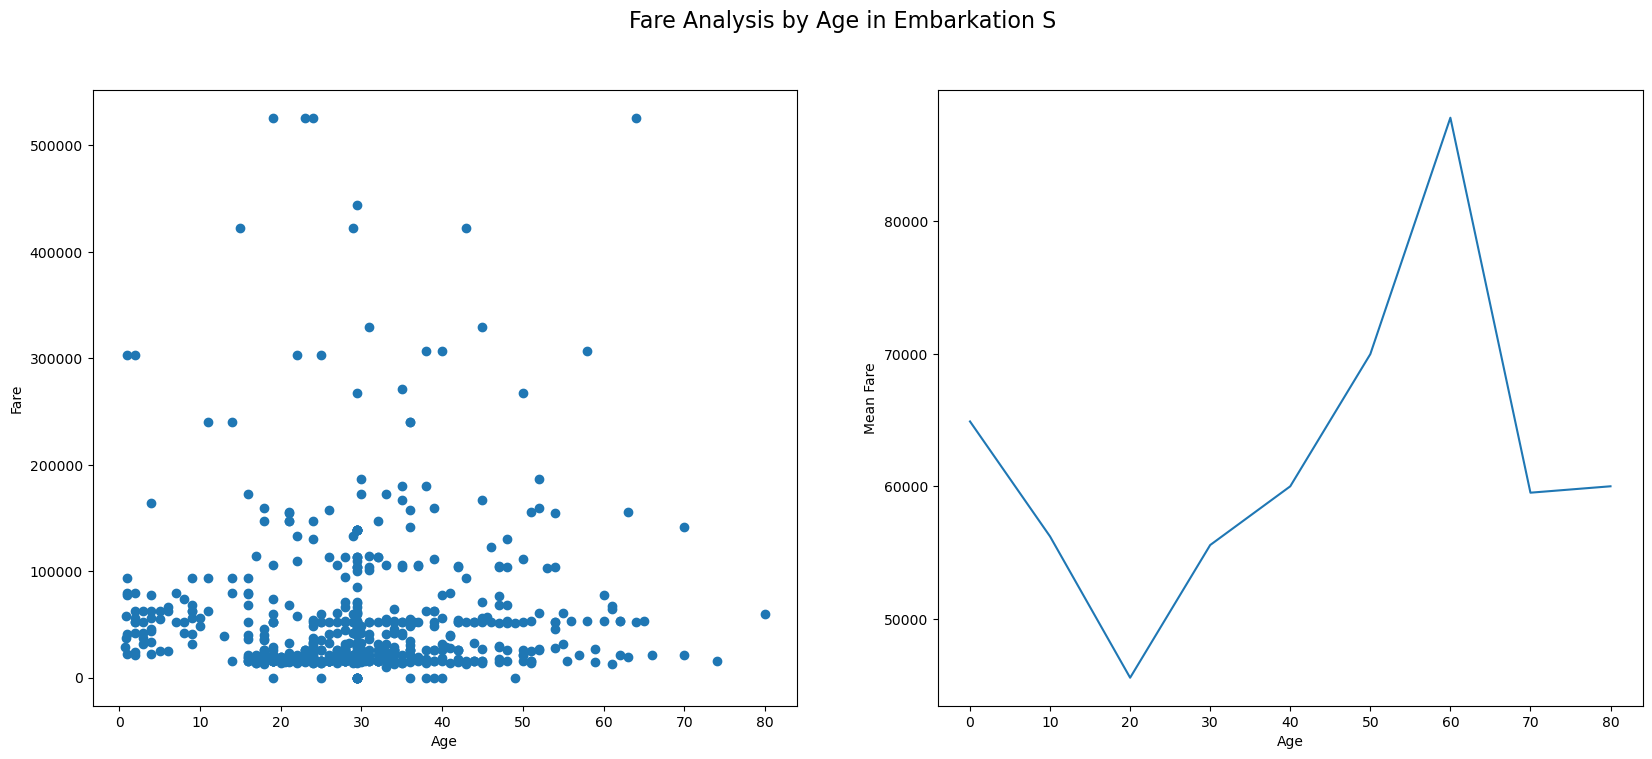

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# scatter
plt.subplot(1,2,1)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(df_plot[df_plot['Embarked']=='S']['Age'], df_plot[df_plot['Embarked']=='S']['Fare'])

# plot
plt.subplot(1,2,2)
plt.xlabel("Age")
plt.ylabel("Mean Fare")
plt.plot(df_plot[df_plot['Embarked']=='S'].groupby('Floored_Age')['Fare'].mean())


plt.suptitle("Fare Analysis by Age in Embarkation S", fontsize=16)
plt.show()

### Exercise 3-2
Deal with all Embarkation.

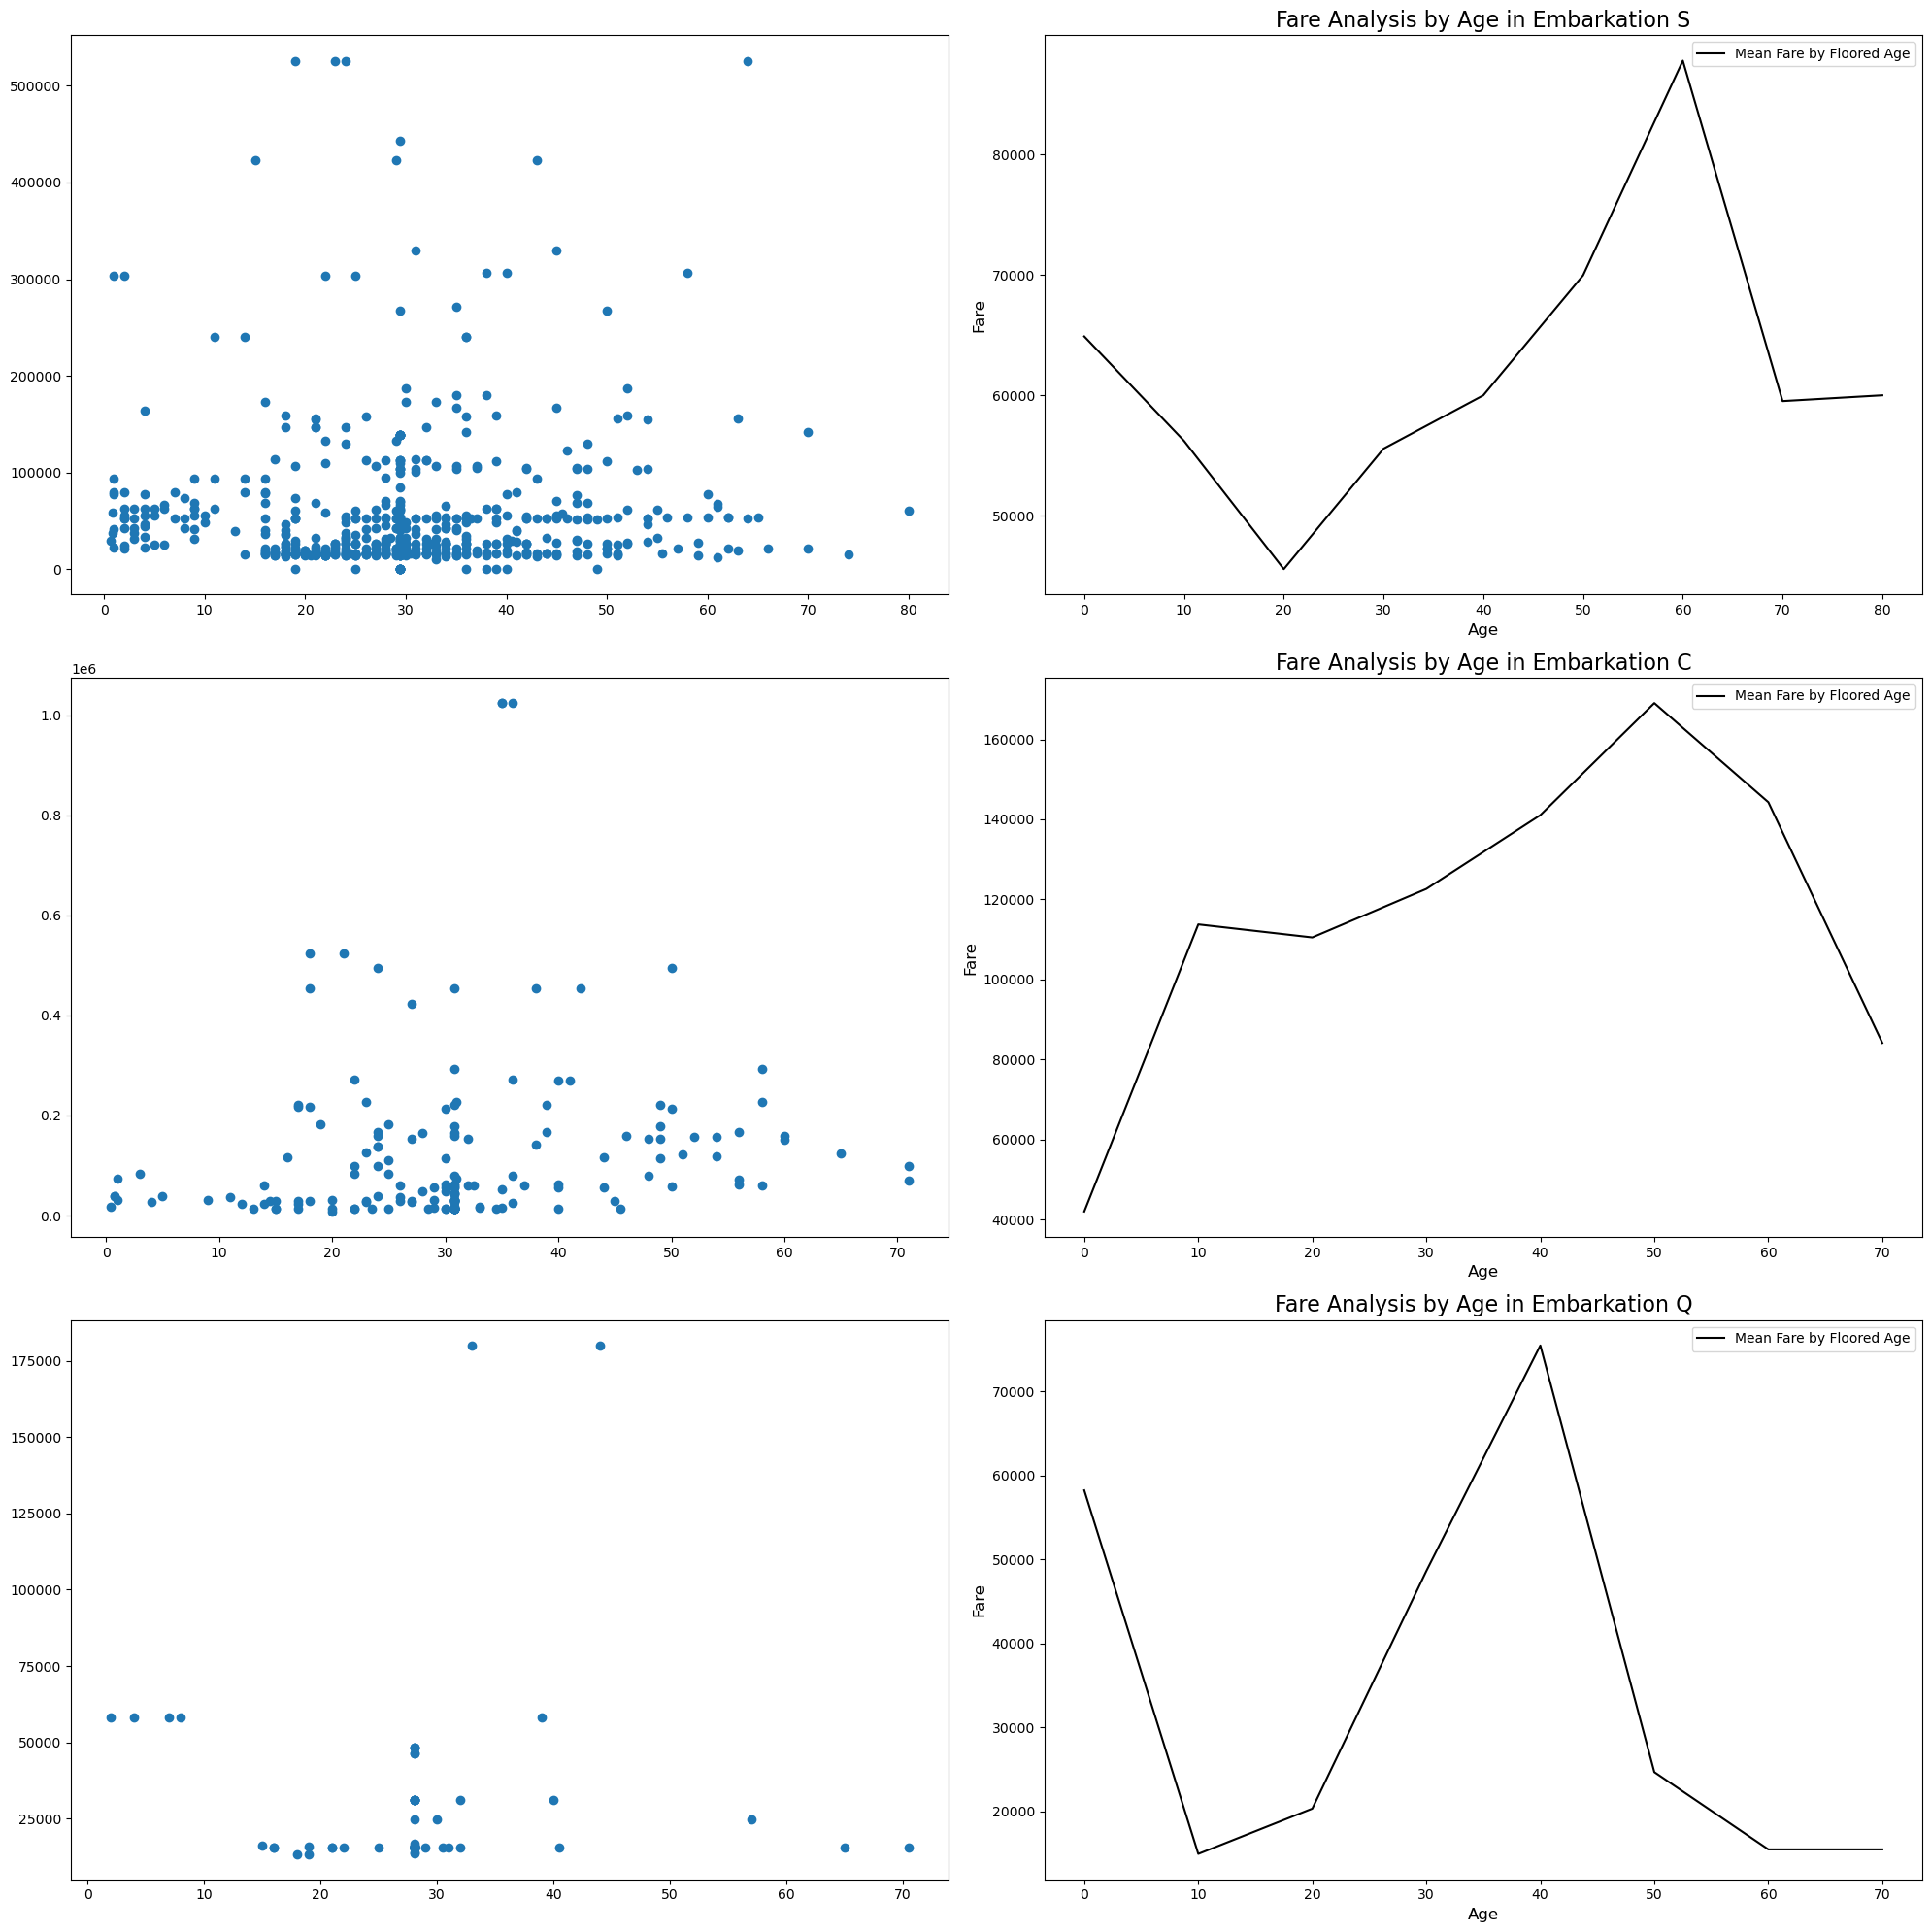

In [28]:
# plt.figure(figsize=(20,20))

# # you must use variable count to draw subplot.
# for count, embark in enumerate(df_plot['Embarked'].unique()):

#     # scatter
#     " _____type your code here_____"



#     # plot
#    " _____type your code here_____"


#     plt.title("Fare Analysis by Age in Embarkation " + embark, fontsize=16)

# plt.show()


plt.figure(figsize=(20, 20))

# You must use variable 'count' to draw subplot.
for count, embark in enumerate(df_plot['Embarked'].unique()):
    plt.subplot(3, 2, count*2 + 1)  # 서브플롯 생성 (최대 3개까지 표시 가능)

    # scatter plot
    subset = df_plot[df_plot['Embarked'] == embark]
    plt.scatter(subset['Age'], subset['Fare'], alpha=1, label=embark)

    plt.subplot(3, 2, count*2 + 2)  # 서브플롯 생성 (최대 3개까지 표시 가능)

    # plot settings
    grouped = subset.groupby('Floored_Age')['Fare'].mean()
    plt.plot(grouped.index, grouped.values, color='black', label='Mean Fare by Floored Age')

    plt.xlabel("Age", fontsize=12)
    plt.ylabel("Fare", fontsize=12)
    plt.legend()
    plt.title("Fare Analysis by Age in Embarkation " + embark, fontsize=16)

plt.tight_layout()
plt.show()


## Exercise 4: Plot (0.5p)
Let's plot some graphs

###Exercise 4-1
Plot a bar graph showing the survival condition with respect to age group

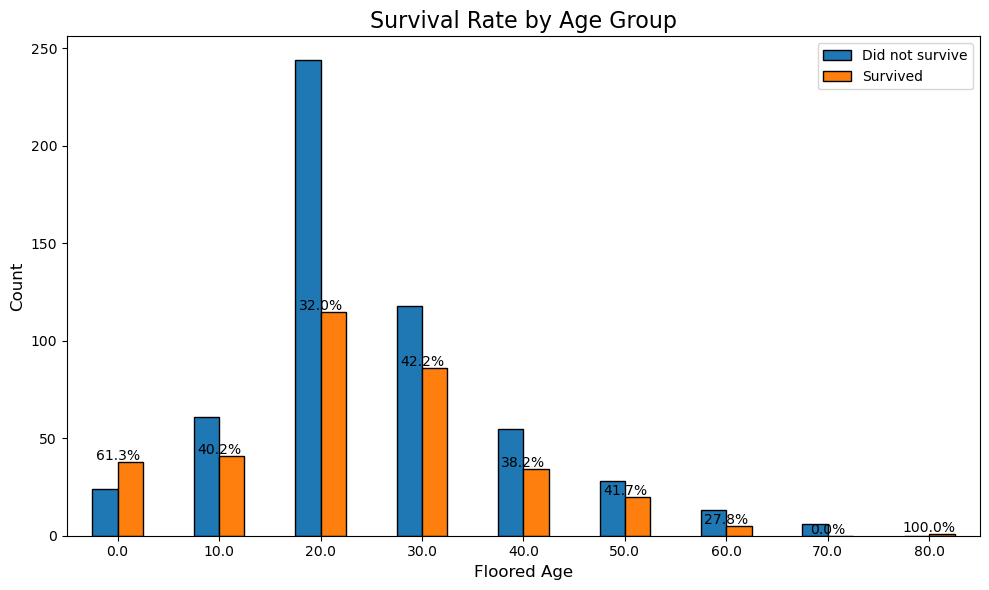

In [39]:
age_survival = df_plot.groupby(['Floored_Age', 'Survived']).size().unstack(fill_value=0)
age_survival['Survival %'] = age_survival[1] / (age_survival[0] + age_survival[1]) * 100

ax = age_survival[[0, 1]].plot(kind='bar', figsize=(10, 6), edgecolor='black')


plt.title("Survival Rate by Age Group", fontsize=16)
plt.xlabel("Floored Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Did not survive", "Survived"])

# Add percentage text above survived bars
for i, val in enumerate(age_survival[1]):
    plt.text(i, val + 1, f"{age_survival['Survival %'].iloc[i]:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))

# # You must use variable 'count' to draw subplot.
# for count, embark in enumerate(df_plot['Embarked'].unique()):
#     plt.subplot(3, 1, count + 1)  # 서브플롯 생성 (최대 3개까지 표시 가능)

#     # scatter plot
#     subset = df_plot[df_plot['Embarked'] == embark]
#     plt.scatter(subset['Age'], subset['Fare'], alpha=0.5, label=embark)

#     # plot settings
#     plt.xlabel("Age", fontsize=12)
#     plt.ylabel("Fare", fontsize=12)
#     plt.legend()
#     plt.title("Fare Analysis by Age in Embarkation " + embark, fontsize=16)

# plt.tight_layout()
# plt.show()


###Exercise 4-2
Plot a bar graph showing the survival condition with respect to gender

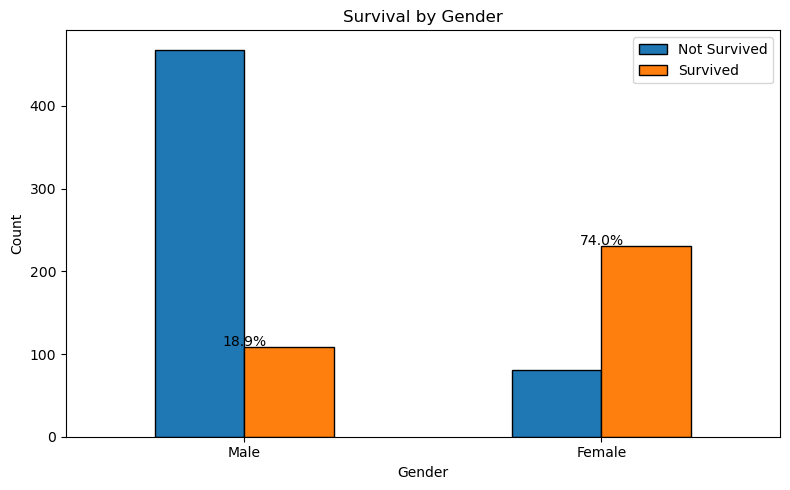

In [42]:
df_plot['Sex_binary'] = df_plot['Sex'].map({'male': 0, 'female': 1})
gender_counts = df_plot.groupby(['Sex_binary', 'Survived']).size().unstack(fill_value=0)
gender_counts['Survival %'] = gender_counts[1] / (gender_counts[0]+gender_counts[1]) * 100

ax = gender_counts[[0, 1]].plot(kind='bar', figsize=(8, 5), edgecolor='black')
ax.set_xticklabels(['Male', 'Female'])
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])

# Add percentage text above survived bars
for i, val in enumerate(gender_counts[1]):
    plt.text(i, val + 1, f"{gender_counts['Survival %'].iloc[i]:.1f}%", ha='center')

plt.tight_layout()
plt.show()


### Exercise 4-3
Plot a bar graph showing the survival condition with respect to both age group and gender

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


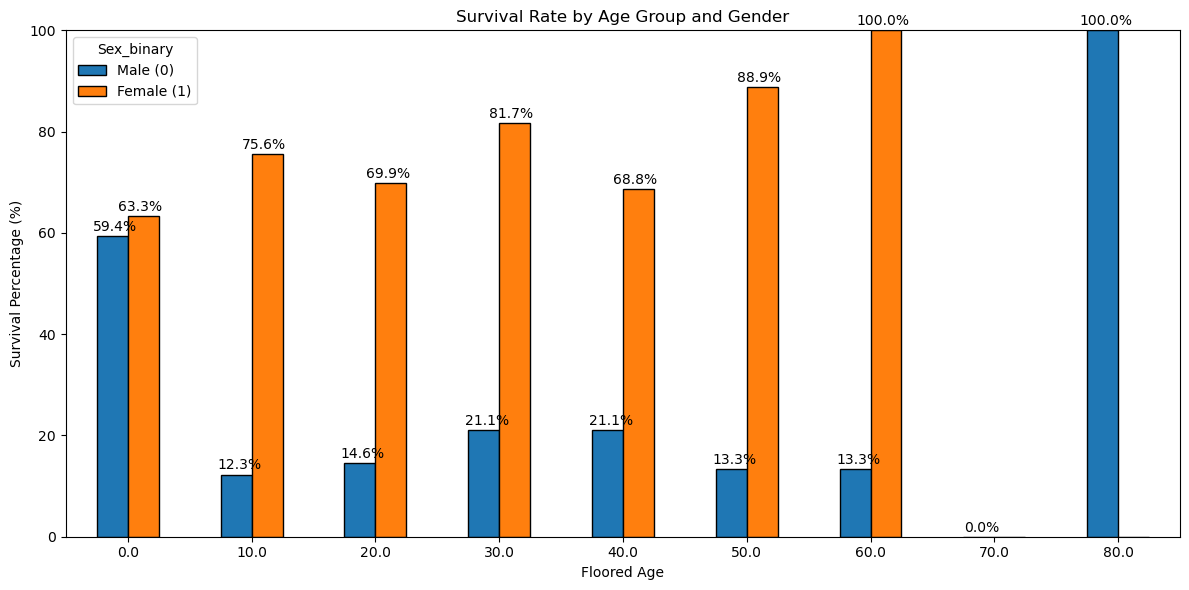

In [44]:
grouped = df_plot.groupby(['Floored_Age', 'Sex_binary', 'Survived']).size().unstack(fill_value=0)
grouped['Survival %'] = grouped[1] / (grouped[0] + grouped[1]) * 100    
pivot = grouped[['Survival %']].unstack(level=1)

ax = pivot.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Survival Rate by Age Group and Gender')
plt.xlabel('Floored Age')
plt.ylabel('Survival Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title='Sex_binary', labels=['Male (0)', 'Female (1)'])

for i in range(len(pivot)):
    for j in range(len(pivot.columns)):
        val = pivot.iloc[i, j]
        plt.text(i + (j - 0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()

##Split Data into Training and Testing Data

In [ ]:
import statsmodels.api as sm

# Shuffle all recordings for randomness
df_shuffled = df_plot.sample(frac=1, random_state=50).reset_index(drop=True)

# Take 80% of data for training, and 20% for testing
train_size = int(0.8 * len(df_shuffled))

df_train = df_shuffled.iloc[:train_size].copy()
df_test = df_shuffled.iloc[train_size:].copy()

In [ ]:
# Prepare train data and label data
X_train = df_train[['Age', 'Fare', 'Sex_binary']]
y_train = df_train['Survived']

X_test = df_test[['Age', 'Fare', 'Sex_binary']]
y_test = df_test['Survived']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

<h2>Train the model using Training Data</h2>

In [ ]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.497043
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  711
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.2551
Time:                        08:00:17   Log-Likelihood:                -353.40
converged:                       True   LL-Null:                       -474.44
Covariance Type:            nonrobust   LLR p-value:                 3.370e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5373      0.253     -6.086      0.000      -2.032      -1.042
Age           -0.0092      0.

<h2>Self Evaluation</h2>

In [ ]:
df_train['Survival_Prob'] = model.predict(X_train)
df_train['Predicted_Label'] = (df_train['Survival_Prob'] >= 0.5).astype(int)
train_accuracy = (df_train['Survived'] == df_train['Predicted_Label']).mean()
print(f"Self Accuracy: {train_accuracy:.2%}")

Self Accuracy: 77.92%


<h2>Model Performance</h2>

In [ ]:
df_test['Survival_Prob'] = model.predict(X_test)
df_test['Predicted_Label'] = (df_test['Survival_Prob'] >= 0.5).astype(int)
print(df_test[['Survived', 'Age', 'Sex', 'Survival_Prob', 'Predicted_Label']].head())

     Survived   Age     Sex  Survival_Prob  Predicted_Label
711         0  48.0    male       0.143528                0
712         0  29.0    male       0.161287                0
713         0  50.0  female       0.677498                1
714         1  24.0  female       0.698796                1
715         1  30.0  female       0.665161                1


In [ ]:
accuracy = (df_test['Survived'] == df_test['Predicted_Label']).mean()
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 79.21%


In [ ]:
df_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Floored_age,Sex_binary,Survival_Prob,Predicted_Label
711,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,26000.0,NaN,S,40.0,0,0.143528,0
712,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,21000.0,NaN,S,20.0,0,0.161287,0
713,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,57425.0,C49,C,50.0,1,0.677498,1
714,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,38516.6,NaN,C,20.0,1,0.698796,1
715,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,24950.0,NaN,S,30.0,1,0.665161,1
